In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
txt = os.getcwd()
txt = txt.split("/")[:-1]
parent_path = "/".join(txt)
os.chdir(parent_path)

In [3]:
# os.getcwd()

In [4]:
import json
import pprint
import objectpath
import pandas as pd

from src.graph_outils import join_path
from query import Query

In [5]:
pp = pprint.PrettyPrinter(indent=1)

In [6]:
fhir_api_url = 'http://hapi.fhir.org/baseR4/'
path_rules = 'data'

## Load example

In [7]:
dirname = 'tests/1'
filename_config = 'config.json'
with open(os.path.join(dirname, filename_config)) as json_file:
    config = json.load(json_file)

## Execute Query

In [8]:
query = Query(fhir_api_url, path_rules)
query.from_config(config)

In [9]:
query.execute()

In [10]:
df = query.main_dataframe
df

,patient:id,patient:gender,patient:name.given,patient:birthDate,patient:name.family,condition:id,condition:verificationStatus,condition:asserter.reference,condition:subject.reference,practitioner:id,practitioner:name,practitioner:name.family
0,Patient/1171644,female,[[Darcy]],1970-01-01,[Smith],Condition/1171652,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/1171647,Patient/1171644,Practitioner/1171647,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]
1,Patient/1171644,female,[[Darcy]],1970-01-01,[Smith],Condition/1171648,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/1171647,Patient/1171644,Practitioner/1171647,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]
2,Patient/ailovdisyb2,female,[[Darcy]],1970-01-01,[Smith],Condition/abc,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/ailovdisyb3,Patient/ailovdisyb2,Practitioner/ailovdisyb3,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]
3,Patient/ailovdisyb2,female,[[Darcy]],1970-01-01,[Smith],Condition/ailovdisyb1,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/ailovdisyb3,Patient/ailovdisyb2,Practitioner/ailovdisyb3,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]
4,Patient/lalo2,female,[[Darcy]],1970-01-01,[Smith],Condition/lalo1,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/lalo3,Patient/lalo2,Practitioner/lalo3,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]


## Functionalities Overview

In [11]:
for _,df in query.dataframes.items():
    display(df.head(5))

,patient:id,patient:gender,patient:name.given,patient:birthDate,patient:name.family
0,Patient/ee8383ea-d062-46db-85d0-c4d7d82255d5,female,"[[Gayle448], [Gayle448]]",1945-09-02,"[Raynor401, Smitham825]"
1,Patient/1171644,female,[[Darcy]],1970-01-01,[Smith]
2,Patient/ailovdisyb2,female,[[Darcy]],1970-01-01,[Smith]
3,Patient/lalo2,female,[[Darcy]],1970-01-01,[Smith]


,practitioner:id,practitioner:name,practitioner:name.family
0,Practitioner/1171647,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]
1,Practitioner/ailovdisyb3,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]
2,Practitioner/lalo3,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]


,condition:id,condition:verificationStatus,condition:asserter.reference,condition:subject.reference
0,Condition/lalo1,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/lalo3,Patient/lalo2
1,Condition/1171652,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/1171647,Patient/1171644
2,Condition/1171648,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/1171647,Patient/1171644
3,Condition/abc,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/ailovdisyb3,Patient/ailovdisyb2
4,Condition/ailovdisyb1,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/ailovdisyb3,Patient/ailovdisyb2


In [12]:
pp.pprint(query.graph_query.resources_alias_info)

{'condition': {'count': False,
               'elements': {'additional_resource': ['id'],
                            'additional_root': [],
                            'join': ['asserter.reference', 'subject.reference'],
                            'select': ['verificationStatus'],
                            'where': ['verificationStatus']},
               'resource_type': 'Condition',
               'search_parameters': {'verification-status': {'prefix': None,
                                                             'value': 'confirmed'}}},
 'patient': {'count': False,
             'elements': {'additional_resource': ['id'],
                          'additional_root': [],
                          'join': [],
                          'select': ['gender', 'name.given', 'birthDate'],
                          'where': ['name.family']},
             'resource_type': 'Patient',
             'search_parameters': {'family': {'prefix': None,
                                          

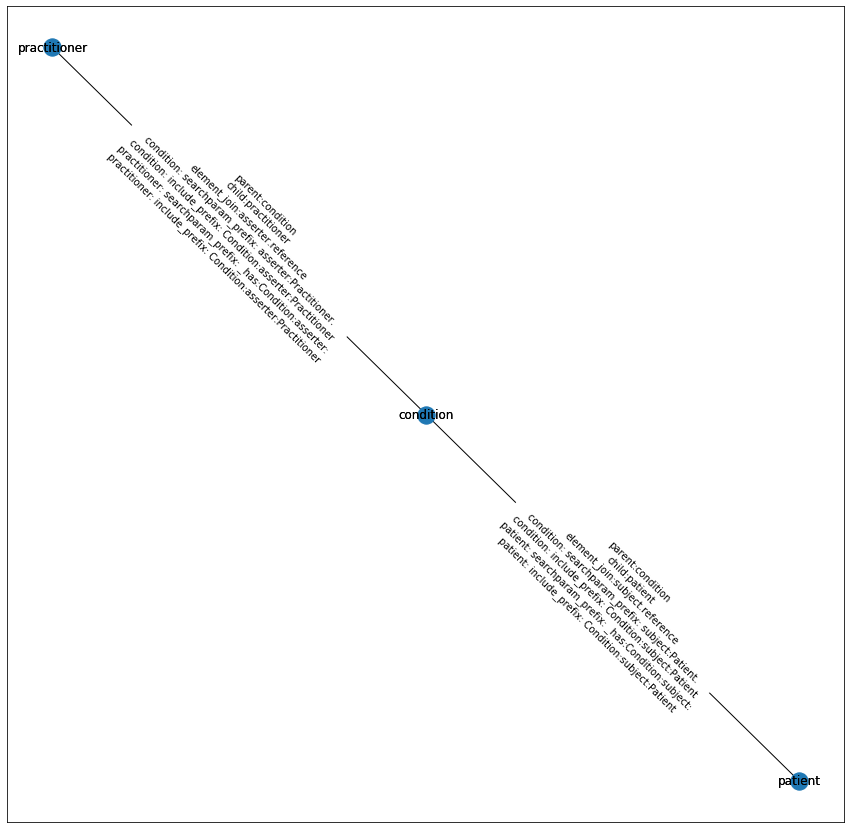

In [13]:
query.graph_query.draw_relations()

## Load example

In [14]:
dirname = 'tests/2'
filename_config = 'config.json'
with open(os.path.join(dirname, filename_config)) as json_file:
    config = json.load(json_file)

## Execute Query

In [15]:
query = Query(fhir_api_url, path_rules)
query.from_config(config)

In [16]:
query.execute()

In [17]:
df = query.main_dataframe
df

,patient:id,patient:birthdate,patient:gender,patient:birthDate,observation:id,observation:component.valueQuantity.value,observation:code,observation:subject.reference
0,Patient/47762,None,male,1986-04-08,Observation/47766,"[107, 60]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/47762
1,Patient/40995,None,male,1974-05-08,Observation/41029,"[117, 65]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/40995
2,Patient/40937,None,female,1992-11-10,Observation/40941,"[107, 60]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/40937
3,Patient/251071,None,female,1979-08-18,Observation/251095,[107],"{'coding': [{'system': 'http://loinc.org', 'co...",Patient/251071
4,Patient/251071,None,female,1979-08-18,Observation/251096,[23.78],"{'coding': [{'system': 'http://loinc.org', 'co...",Patient/251071
...,...,...,...,...,...,...,...,...
90,Patient/54917,None,male,1989-01-01,Observation/54919,"[107, 60]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/54917
91,Patient/40892,None,male,1994-08-25,Observation/40896,"[107, 60]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/40892
92,Patient/1164082,None,male,1974-12-25,Observation/1167058,"[107, 60]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/1164082
93,Patient/ailovdisyb4,None,female,1976-01-01,Observation/ailovdisyb5,"[107, 60]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/ailovdisyb4


## Functionalities Overview

In [18]:
for _,df in query.dataframes.items():
    display(df.head(5))

,patient:id,patient:birthdate,patient:gender,patient:birthDate
0,Patient/47762,None,male,1986-04-08
1,Patient/40995,None,male,1974-05-08
2,Patient/40937,None,female,1992-11-10
3,Patient/251071,None,female,1979-08-18
4,Patient/642992,None,female,1988-08-06


,observation:id,observation:component.valueQuantity.value,observation:code,observation:subject.reference
0,Observation/40798,"[107, 60]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/40772
1,Observation/40799,"[109, 62]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/40772
2,Observation/40800,"[111, 64]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/40772
3,Observation/40842,"[107, 60]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/40838
4,Observation/40847,"[107, 60]","{'coding': [{'system': 'http://loinc.org', 'co...",Patient/40843


In [19]:
pp.pprint(query.graph_query.resources_alias_info)

{'observation': {'count': False,
                 'elements': {'additional_resource': ['id'],
                              'additional_root': [],
                              'join': ['subject.reference'],
                              'select': ['component.valueQuantity.value'],
                              'where': ['code']},
                 'resource_type': 'Observation',
                 'search_parameters': {'code': {'prefix': None,
                                                'value': 'http://loinc.org|85354-9'}}},
 'patient': {'count': False,
             'elements': {'additional_resource': ['id'],
                          'additional_root': [],
                          'join': [],
                          'select': ['birthdate', 'gender'],
                          'where': ['birthDate']},
             'resource_type': 'Patient',
             'search_parameters': {'birthdate': {'prefix': 'gt',
                                                 'value': '1970'}}}}


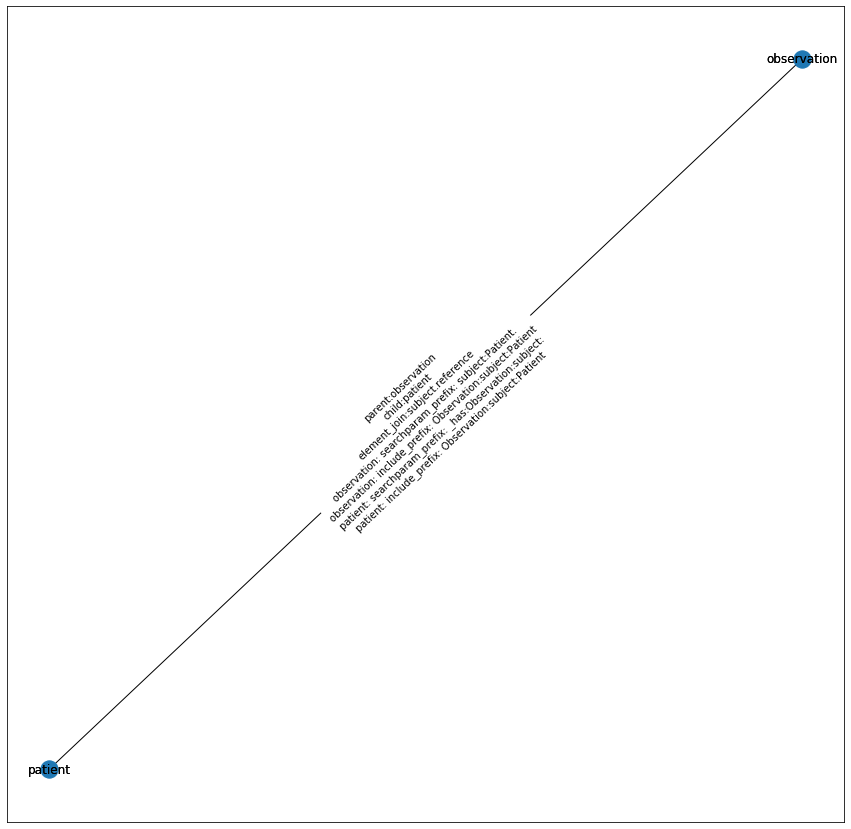

In [20]:
query.graph_query.draw_relations()

## Load example

In [21]:
dirname = 'tests/3'
filename_config = 'config.json'
with open(os.path.join(dirname, filename_config)) as json_file:
    config = json.load(json_file)

## Execute Query

In [22]:
query = Query(fhir_api_url, path_rules)
query.from_config(config)

In [23]:
query.execute()

In [24]:
df = query.main_dataframe
df

,patient:id,patient:gender,patient:name.given,patient:birthDate,patient:name.family,condition:id,condition:verificationStatus,condition:asserter.reference,condition:subject.reference,condition:encounter.reference,encounter:id,practitioner:id,practitioner:name,practitioner:name.family
0,Patient/lalo2,female,[[Darcy]],1970-01-01,[Smith],Condition/lalo1,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/lalo3,Patient/lalo2,Encounter/lalo0,Encounter/lalo0,Practitioner/lalo3,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]


## Functionalities Overview

In [25]:
for _,df in query.dataframes.items():
    display(df.head(5))

,patient:id,patient:gender,patient:name.given,patient:birthDate,patient:name.family
0,Patient/ee8383ea-d062-46db-85d0-c4d7d82255d5,female,"[[Gayle448], [Gayle448]]",1945-09-02,"[Raynor401, Smitham825]"
1,Patient/1171644,female,[[Darcy]],1970-01-01,[Smith]
2,Patient/ailovdisyb2,female,[[Darcy]],1970-01-01,[Smith]
3,Patient/lalo2,female,[[Darcy]],1970-01-01,[Smith]


,practitioner:id,practitioner:name,practitioner:name.family
0,Practitioner/1171647,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]
1,Practitioner/ailovdisyb3,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]
2,Practitioner/lalo3,"[{'use': 'official', 'family': 'van den broek'...",[van den broek]


,condition:id,condition:verificationStatus,condition:asserter.reference,condition:subject.reference,condition:encounter.reference
0,Condition/lalo1,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/lalo3,Patient/lalo2,Encounter/lalo0
1,Condition/1171652,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/1171647,Patient/1171644,None
2,Condition/1171648,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/1171647,Patient/1171644,None
3,Condition/abc,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/ailovdisyb3,Patient/ailovdisyb2,None
4,Condition/ailovdisyb1,{'coding': [{'system': 'http://terminology.hl7...,Practitioner/ailovdisyb3,Patient/ailovdisyb2,None


,encounter:id
0,Encounter/1046
1,Encounter/25418
2,Encounter/30036
3,Encounter/30144
4,Encounter/1022


In [26]:
pp.pprint(query.graph_query.resources_alias_info)

{'condition': {'count': False,
               'elements': {'additional_resource': ['id'],
                            'additional_root': [],
                            'join': ['asserter.reference',
                                     'subject.reference',
                                     'encounter.reference'],
                            'select': ['verificationStatus'],
                            'where': ['verificationStatus']},
               'resource_type': 'Condition',
               'search_parameters': {'verification-status': {'prefix': None,
                                                             'value': 'confirmed'}}},
 'encounter': {'count': False,
               'elements': {'additional_resource': ['id'],
                            'additional_root': [],
                            'join': [],
                            'select': [],
                            'where': []},
               'resource_type': 'Encounter',
               'search_parameters': {}}

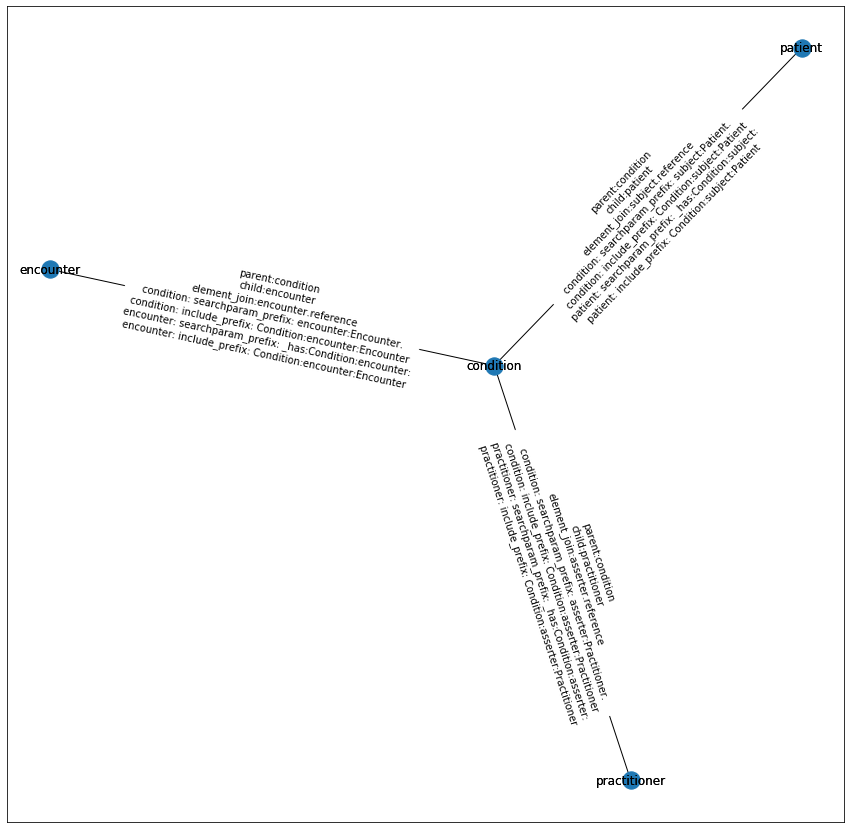

In [27]:
query.graph_query.draw_relations()